# Set Working Directory and List

In [2]:
# Set working directory
import os
os.chdir('C:/Users/Sven Konermann/Documents/Master/2_Semester/Applied_Data_Science/Gruppe')
#os.chdir('C:/Users/manue/OneDrive - ZHAW/MSc Wirtschaftsinformatik/2. Semester/Applied Data Science/ADS Projekt')
# Warnings settings
import warnings
warnings.filterwarnings("ignore")

In [88]:

ua_path = "user_agents.txt"
ua_list = [line.rstrip('\n') for line in open(ua_path)]
ua_list[:5]

['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0',
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.4 Safari/605.1.15']

In [89]:
# List with URLS for Webscraping part 1
url_1_raw = "URL_1.txt"
url_1 = [line.rstrip('\n') for line in open(url_1_raw)]
url_1[:5]

['https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=20735&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=193736&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=324977&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=1555183&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=3193857&dateStart=01.05.']

In [90]:
# List with URLS for Webscraping part 2
url_2_raw = "URL_2.txt"
url_2 = [line.rstrip('\n') for line in open(url_2_raw)]
url_2[:5]

['&interval=Y5&assetName=DAX&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=EURO STOXX 50&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=Dow Jones&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=SMI&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=MSCI WORLD &exchange=auÃŸerbÃ¶rslich']

## Get Data with automated Scraping (Onvista)

In [ ]:
from selenium import webdriver
#from selenium.webdriver.chrome.options import Options
from selenium.webdriver.firefox.options import Options
import random

opts = Options()
opts.add_argument("--headless")
#opts.add_argument("--window-size=1200,800")
opts.add_argument("user-agent=" + random.choice(ua_list))
#driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)
driver = webdriver.Chrome(executable_path='geckodriver.exe', options=opts)

#Websites to Scrape
IndexListe= ["DAX", "EURO STOXX 50", "Dow Jones",  "SMI", "MSCI World", "FTSE", "ATX", "SDAX", "Tec DAX", "NASDAQ 100", "Nikkei", "Hang Seng", "SHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]

#IndexListe= ["DAX"]

# Daten in csv Datei schreiben
import pandas as pd
import csv



#Scraping Loop
x=0
while x < len(url_1):
    Text=""
    Jahr=2002
    while Jahr <=2017:
        URL = str(url_1[x])+str(Jahr)+str(url_2[x])
        driver.get(URL)
        text1 = driver.find_element_by_css_selector('body > div.INHALT.WEBSEITE > article > table > tbody').text
        Text= Text + '\n' + text1
        templist = []
        Table_dict={ 'Gescrapte Finanzdaten': Text}
        templist.append(Table_dict)
        df = pd.DataFrame(templist)
        df.to_csv(IndexListe[x]+".csv")
        Jahr+=5
    x+=1
    
    



# Examples using tag name
#text = driver.find_element_by_xpath('/html/body/div[1]/article').text

# Further examples (find out by yourself)
# text = driver.find_element_by_name('').text
# text = driver.find_element_by_tag_name('').text
# text = driver.find_element_by_id('').text

## Data Cleansing and Preparation onvista

In [104]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline
IndexListe= ["DAX", "EURO STOXX 50", "Dow Jones",  "SMI", "MSCI World", "FTSE", "ATX", "SDAX", "Tec DAX", "NASDAQ 100", "Nikkei", "Hang Seng", "SHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]
SchlussIndexListe= ["Schluss DAX", "Schluss EURO STOXX 50", "Schluss Dow Jones",  "Schluss SMI", "Schluss MSCI World", "Schluss FTSE", "Schluss ATX", "Schluss SDAX", "Schluss Tec DAX", "Schluss NASDAQ 100", "Schluss Nikkei", "Schluss Hang Seng", "Schluss SHANGHAI STOCK EXCHANGE B SHARES", "Schluss Emerging Markets", "Schluss Bovespa"]
Indexdf= ["dfDAX", "dfEURO STOXX 50", "dfDow Jones",  "dfSMI", "dfMSCI World", "dfFTSE", "dfATX", "dfSDAX", "dfTec DAX", "dfNASDAQ 100", "dfNikkei", "dfHang Song", "dfSHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]
x=0
j=0
while x < len(IndexListe):
    Indexdf[x]= pd.read_csv(IndexListe[x]+".csv", delimiter=' ', header=None, skiprows=2, names=['Datum','Eröffnung','Hoch','Tief',SchlussIndexListe[x],'Volumen'], index_col=False)
    Indexdf[x]=pd.DataFrame(Indexdf[x])
    Indexdf[x].drop(columns=['Eröffnung','Hoch','Tief','Volumen'], inplace=True)
    x+=1

x=1
result=Indexdf[0]
while x < len(IndexListe):
    result=pd.merge(result, Indexdf[x], how="inner", on="Datum")
    x+=1
    
x=0
while x < len(IndexListe):
    for i in range (len(result)):
        result.loc[i,SchlussIndexListe[x]] = result.loc[i,SchlussIndexListe[x]].replace('.','')
        result.loc[i,SchlussIndexListe[x]] = result.loc[i,SchlussIndexListe[x]].replace(',','.')
        i+=1
    x+=1

#df
#result=pd.concat([Indexdf[0], Indexdf[1]], axis=1)
#result=Indexdf[0].append([Indexdf[1], Indexdf[2], Indexdf[3], Indexdf[4], Indexdf[5], Indexdf[6], Indexdf[7], Indexdf[8], Indexdf[9], Indexdf[10], Indexdf[11], Indexdf[12]])

#result = result.dropna()
# Show the content of the dataframe:



In [105]:
result.shape

(3777, 16)

In [106]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777 entries, 0 to 3776
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Datum                                     3777 non-null   object
 1   Schluss DAX                               3777 non-null   object
 2   Schluss EURO STOXX 50                     3777 non-null   object
 3   Schluss Dow Jones                         3777 non-null   object
 4   Schluss SMI                               3777 non-null   object
 5   Schluss MSCI World                        3777 non-null   object
 6   Schluss FTSE                              3777 non-null   object
 7   Schluss ATX                               3777 non-null   object
 8   Schluss SDAX                              3777 non-null   object
 9   Schluss Tec DAX                           3777 non-null   object
 10  Schluss NASDAQ 100                        3777 n

In [107]:
result[SchlussIndexListe] = result[SchlussIndexListe].astype(float, errors = 'raise')
result['Datum'] = pd.to_datetime(result.Datum, format="%d.%m.%Y")
print(result.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777 entries, 0 to 3776
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Datum                                     3777 non-null   datetime64[ns]
 1   Schluss DAX                               3777 non-null   float64       
 2   Schluss EURO STOXX 50                     3777 non-null   float64       
 3   Schluss Dow Jones                         3777 non-null   float64       
 4   Schluss SMI                               3777 non-null   float64       
 5   Schluss MSCI World                        3777 non-null   float64       
 6   Schluss FTSE                              3777 non-null   float64       
 7   Schluss ATX                               3777 non-null   float64       
 8   Schluss SDAX                              3777 non-null   float64       
 9   Schluss Tec DAX               

In [108]:
result = result.dropna()
result.isna().sum()

Datum                                       0
Schluss DAX                                 0
Schluss EURO STOXX 50                       0
Schluss Dow Jones                           0
Schluss SMI                                 0
Schluss MSCI World                          0
Schluss FTSE                                0
Schluss ATX                                 0
Schluss SDAX                                0
Schluss Tec DAX                             0
Schluss NASDAQ 100                          0
Schluss Nikkei                              0
Schluss Hang Seng                           0
Schluss SHANGHAI STOCK EXCHANGE B SHARES    0
Schluss Emerging Markets                    0
Schluss Bovespa                             0
dtype: int64

In [109]:
result.isnull().sum()

Datum                                       0
Schluss DAX                                 0
Schluss EURO STOXX 50                       0
Schluss Dow Jones                           0
Schluss SMI                                 0
Schluss MSCI World                          0
Schluss FTSE                                0
Schluss ATX                                 0
Schluss SDAX                                0
Schluss Tec DAX                             0
Schluss NASDAQ 100                          0
Schluss Nikkei                              0
Schluss Hang Seng                           0
Schluss SHANGHAI STOCK EXCHANGE B SHARES    0
Schluss Emerging Markets                    0
Schluss Bovespa                             0
dtype: int64

In [110]:
result.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3772    False
3773    False
3774    False
3775    False
3776    False
Length: 3777, dtype: bool

In [111]:
result.duplicated().sum()

0

In [112]:
result.describe()

,Schluss DAX,Schluss EURO STOXX 50,Schluss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa
count,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000
mean,8549.100847,3191.610479,16768.908645,7910.668276,1613.268963,6061.287241,2779.121422,7189.182695,1450.902121,4357.791109,15884.951832,21503.454488,235.364546,921.694906,60622.199677
std,3444.776653,565.195754,7426.741707,1853.979352,552.929497,1001.015443,799.913877,3892.434299,986.222382,3719.110883,5790.708394,5166.947401,90.682677,243.458356,26807.270970
min,2423.870000,1817.240000,6594.440000,4085.600000,688.638000,3512.090000,1157.180000,1694.580000,329.520000,1018.660000,7054.980000,8409.000000,51.340000,272.267000,11052.000000
25%,5802.260000,2773.180000,10858.140000,6317.720000,1193.880000,5395.700000,2228.480000,4166.520000,707.190000,1734.680000,10644.130000,18892.790000,177.790000,807.454000,45120.360000
50%,7739.200000,3161.600000,13548.940000,8037.940000,1515.992000,6140.390000,2605.400000,5903.660000,920.120000,2718.720000,15391.480000,22299.630000,249.375000,977.733000,57068.180000
75%,11585.100000,3567.250000,21144.180000,9039.610000,1892.713000,6826.050000,3280.440000,10083.340000,2245.440000,5726.310000,20033.520000,24878.240000,294.035000,1070.999000,70459.770000
max,16271.750000,4556.970000,36799.650000,12926.560000,3248.118000,7788.440000,4971.370000,17412.570000,3986.960000,16573.343000,30670.100000,33111.950000,536.093000,1430.026000,130776.270000


In [113]:
result.to_csv("Indizes.csv")    
result

,Datum,Schluss DAX,Schluss EURO STOXX 50,Schluss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa
0,2003-03-24,2548.37,2124.78,8214.60,4230.70,764.795,3743.30,1157.18,1700.34,337.78,1047.100,8435.07,9108.45,120.800,279.256,11052.00
1,2003-03-25,2636.10,2184.98,8280.20,4263.60,771.798,3762.00,1159.88,1712.51,344.77,1066.570,8238.76,9062.15,119.090,277.982,11248.00
2,2003-03-26,2579.33,2172.64,8229.80,4247.10,770.102,3793.10,1171.04,1717.30,346.33,1066.300,8351.92,9047.09,118.060,278.743,11206.00
3,2003-03-27,2584.05,2132.51,8201.40,4194.50,766.602,3729.10,1166.62,1703.45,340.55,1061.930,8368.67,8872.32,122.610,277.431,11233.00
4,2003-03-28,2520.84,2132.11,8145.70,4207.60,762.954,3708.50,1162.82,1697.90,338.76,1046.720,8280.16,8848.26,121.650,277.317,11396.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2022-04-22,14142.09,3840.01,33811.40,12258.33,2882.453,7521.68,3295.16,14225.23,3172.62,13356.869,27105.26,20616.81,288.973,1075.598,111077.51
3773,2022-04-25,13924.17,3757.59,34049.46,12084.98,2877.705,7380.54,3227.02,13882.57,3146.53,13533.224,26590.78,19876.88,278.236,1046.043,110684.95
3774,2022-04-26,13756.40,3721.36,33240.18,11933.28,2810.996,7386.19,3194.05,13706.51,3079.53,13009.712,26700.11,19898.74,275.658,1049.394,108212.86
3775,2022-04-27,13793.94,3734.64,33301.93,12051.48,2807.510,7425.61,3232.27,13684.57,3091.05,13003.356,26386.63,19972.84,283.198,1043.744,109349.37


In [114]:
print("Anzahl Zeilen im Datensatz: {}".format(result.shape[0]))
print("Anzahl Spalten im Datensatz: {}".format(result.shape[1]))

Anzahl Zeilen im Datensatz: 3777
Anzahl Spalten im Datensatz: 16


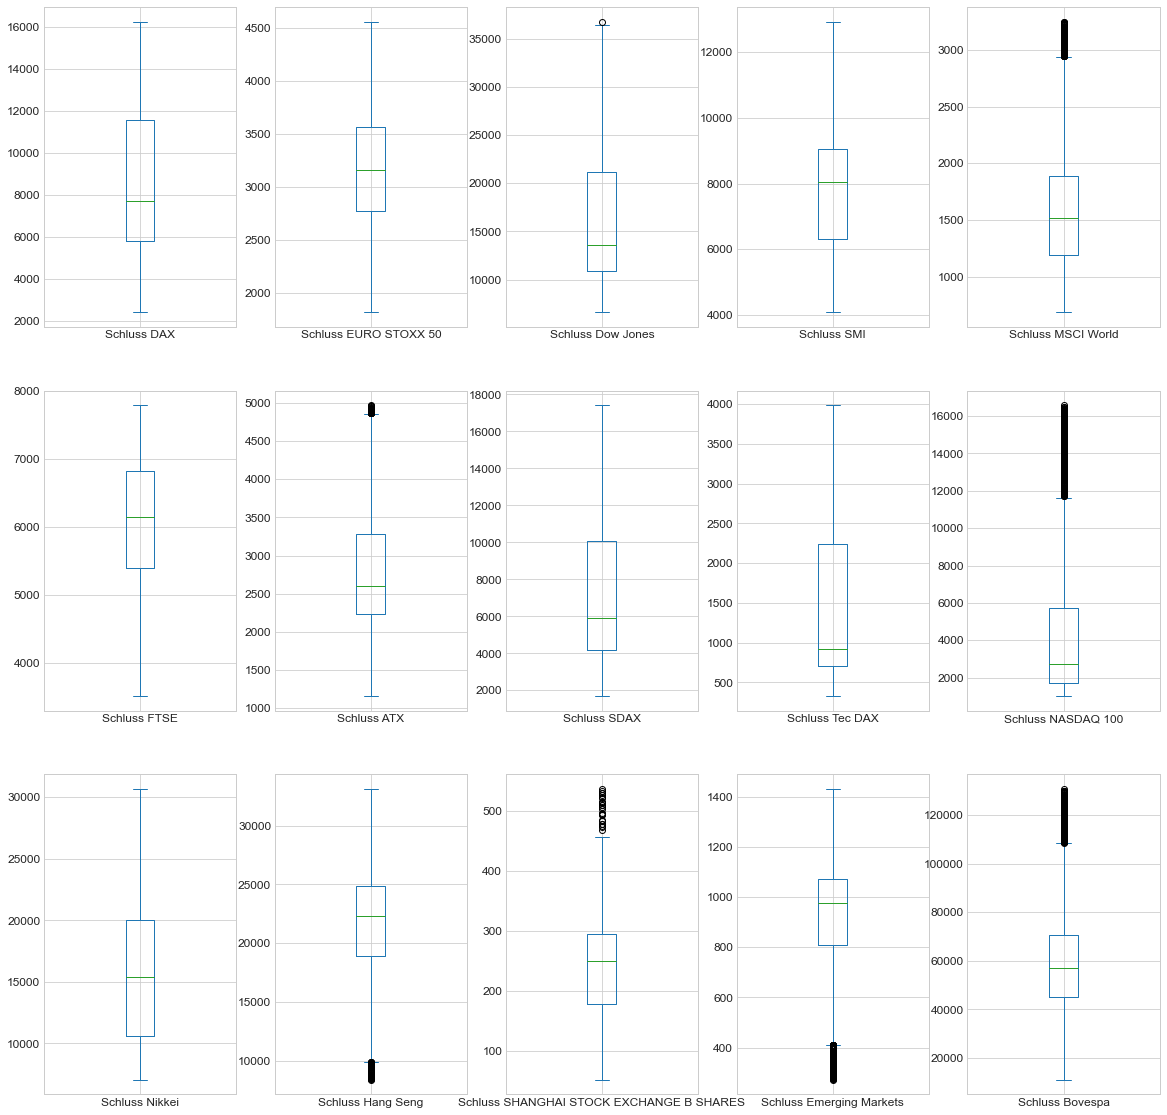

In [115]:
result.plot(kind="box", subplots=True, layout= (3,5), fontsize=12, figsize=(20,20));

## Get Data with API (Yahoo-Finance)

In [236]:
#!pip install pathlib
#!pip install ruamel-yaml
#!pip install yfinance
#!pip install requests
#!pip install cryptowatch
#!pip install cryptowatch-sdk

In [116]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
tickers_list= ['PL=F','GC=F', 'CL=F', 'SI=F', 'ZW=F']
data = yf.download(tickers_list, '2002-1-1')['Adj Close']

data.columns =['Schluss Platin', 'Schluss Gold', 'Schluss Öl', 'Schluss Silber', 'Schluss Weizen']
#CL=F: Öl
#PL=F: Platinum
#SI=F: Silver
#ZW=F: Weizen

data

#data.to_csv("Rohstoffe.csv") 

[*********************100%***********************]  5 of 5 completed


,Schluss Platin,Schluss Gold,Schluss Öl,Schluss Silber,Schluss Weizen
Date,,,,,
2001-12-31,19.840000,278.700012,493.000000,4.579000,291.00
2002-01-02,21.010000,278.899994,483.500000,4.526000,292.00
2002-01-03,20.370001,278.200012,485.500000,4.599000,292.25
2002-01-04,21.620001,278.899994,478.200012,4.642000,301.00
2002-01-07,21.480000,278.600006,476.299988,4.660000,308.00
...,...,...,...,...,...
2022-06-06,118.500000,1839.199951,1030.800049,22.073999,1093.00
2022-06-07,119.410004,1847.500000,1013.700012,22.159000,1071.75
2022-06-08,122.110001,1851.900024,1012.400024,22.073999,1074.75


## Data Cleansing and Preparation Yahoo-Finance

In [117]:
data.shape

(5150, 5)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5150 entries, 2001-12-31 to 2022-06-10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Schluss Platin  5139 non-null   float64
 1   Schluss Gold    5135 non-null   float64
 2   Schluss Öl      4437 non-null   float64
 3   Schluss Silber  5135 non-null   float64
 4   Schluss Weizen  5123 non-null   float64
dtypes: float64(5)
memory usage: 241.4 KB


In [119]:
data.isna().sum()

Schluss Platin     11
Schluss Gold       15
Schluss Öl        713
Schluss Silber     15
Schluss Weizen     27
dtype: int64

In [120]:
data = data.dropna()

In [121]:
data.isna().sum()

Schluss Platin    0
Schluss Gold      0
Schluss Öl        0
Schluss Silber    0
Schluss Weizen    0
dtype: int64

In [122]:
data.duplicated()

Date
2001-12-31    False
2002-01-02    False
2002-01-03    False
2002-01-04    False
2002-01-07    False
              ...  
2022-06-06    False
2022-06-07    False
2022-06-08    False
2022-06-09    False
2022-06-10    False
Length: 4424, dtype: bool

In [123]:
data.duplicated().sum()

0

In [124]:
data.describe()

,Schluss Platin,Schluss Gold,Schluss Öl,Schluss Silber,Schluss Weizen
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,65.238325,1166.697445,1128.573101,17.704829,545.012376
std,24.614681,478.748618,350.220599,8.357971,176.983768
min,-37.630001,278.100006,465.200012,4.243000,256.000000
25%,46.629999,838.975006,874.975006,13.336750,421.000000
50%,61.725000,1254.700012,1007.500000,17.018000,513.750000
75%,86.190002,1506.724976,1429.825043,22.467500,653.500000
max,145.289993,2051.500000,2251.100098,48.584000,1425.250000


In [125]:
print("Anzahl Zeilen im Datensatz: {}".format(data.shape[0]))
print("Anzahl Spalten im Datensatz: {}".format(data.shape[1]))

Anzahl Zeilen im Datensatz: 4424
Anzahl Spalten im Datensatz: 5


In [126]:
data.to_csv("Rohstoffe.csv")    
data

,Schluss Platin,Schluss Gold,Schluss Öl,Schluss Silber,Schluss Weizen
Date,,,,,
2001-12-31,19.840000,278.700012,493.000000,4.579000,291.00
2002-01-02,21.010000,278.899994,483.500000,4.526000,292.00
2002-01-03,20.370001,278.200012,485.500000,4.599000,292.25
2002-01-04,21.620001,278.899994,478.200012,4.642000,301.00
2002-01-07,21.480000,278.600006,476.299988,4.660000,308.00
...,...,...,...,...,...
2022-06-06,118.500000,1839.199951,1030.800049,22.073999,1093.00
2022-06-07,119.410004,1847.500000,1013.700012,22.159000,1071.75
2022-06-08,122.110001,1851.900024,1012.400024,22.073999,1074.75


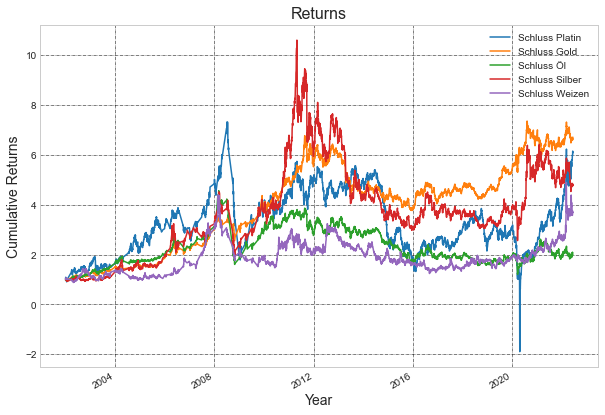

In [127]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

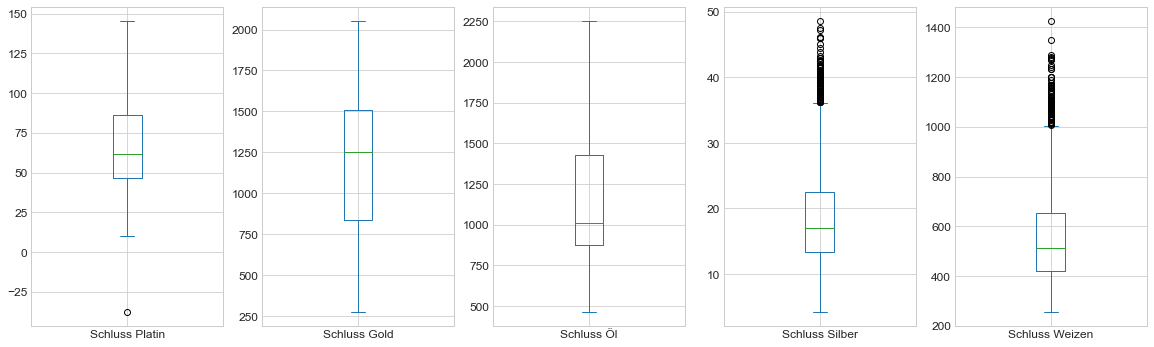

In [128]:
data.plot(kind="box", subplots=True, layout= (3,5), fontsize=12, figsize=(20,20));

In [129]:
result=pd.merge(result, data, how="inner", left_on="Datum", right_on='Date')

In [130]:
result.to_csv("Gesamtliste.csv")  
result

,Datum,Schluss DAX,Schluss EURO STOXX 50,Schluss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa,Schluss Platin,Schluss Gold,Schluss Öl,Schluss Silber,Schluss Weizen
0,2003-03-24,2548.37,2124.78,8214.60,4230.70,764.795,3743.30,1157.18,1700.34,337.78,1047.100,8435.07,9108.45,120.800,279.256,11052.00,28.660000,329.500000,643.000000,4.359000,281.00
1,2003-03-25,2636.10,2184.98,8280.20,4263.60,771.798,3762.00,1159.88,1712.51,344.77,1066.570,8238.76,9062.15,119.090,277.982,11248.00,27.969999,328.399994,635.299988,4.386000,281.00
2,2003-03-26,2579.33,2172.64,8229.80,4247.10,770.102,3793.10,1171.04,1717.30,346.33,1066.300,8351.92,9047.09,118.060,278.743,11206.00,28.629999,330.299988,637.900024,4.391000,284.25
3,2003-03-27,2584.05,2132.51,8201.40,4194.50,766.602,3729.10,1166.62,1703.45,340.55,1061.930,8368.67,8872.32,122.610,277.431,11233.00,30.370001,328.700012,633.900024,4.386000,283.50
4,2003-03-28,2520.84,2132.11,8145.70,4207.60,762.954,3708.50,1162.82,1697.90,338.76,1046.720,8280.16,8848.26,121.650,277.317,11396.00,30.160000,328.700012,634.700012,4.429000,279.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,2022-04-22,14142.09,3840.01,33811.40,12258.33,2882.453,7521.68,3295.16,14225.23,3172.62,13356.869,27105.26,20616.81,288.973,1075.598,111077.51,102.070000,1931.000000,925.099976,24.257000,1065.50
3225,2022-04-25,13924.17,3757.59,34049.46,12084.98,2877.705,7380.54,3227.02,13882.57,3146.53,13533.224,26590.78,19876.88,278.236,1046.043,110684.95,98.540001,1893.199951,902.299988,23.667999,1062.00
3226,2022-04-26,13756.40,3721.36,33240.18,11933.28,2810.996,7386.19,3194.05,13706.51,3079.53,13009.712,26700.11,19898.74,275.658,1049.394,108212.86,101.699997,1901.400024,911.900024,23.542000,1083.25
3227,2022-04-27,13793.94,3734.64,33301.93,12051.48,2807.510,7425.61,3232.27,13684.57,3091.05,13003.356,26386.63,19972.84,283.198,1043.744,109349.37,102.019997,1885.900024,910.099976,23.458000,1080.00


## Get Data with API (Cryptowatch)

In [ ]:
#!pip install pathlib
#!pip install ruamel-yaml
#!pip install yfinance

In [31]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
#Bibliotheksimport zur Warnungssteuerung
import warnings
warnings.filterwarnings("ignore")
#Instalacion e importacion de libreria de Cryptowatch
import logging
import cryptowatch as cw
#API-SCHLÜSSEL erforderlich, um die Cryptowatch-Bibliothek zu verwenden
cw.api_key = "BM0DRS9QDJ4W7JCL76PD"

logging.basicConfig()
logging.getLogger("cryptowatch").setLevel(logging.WARNING)

cw.exchanges.list()

#Wählen Sie Exchange und CryptoActive zur Analyse aus


##Sehen Sie sich die verschiedenen Cryptoactives an, die in der ausgewählten Börse verfügbar sind
#list = []
#selected = cw.markets.list(MARKET)
#for market in selected.markets:
#    list.append(market.pair)
#df_list = pd.DataFrame (list, columns = ['Währung'])
#print(df_list)

#Wir wählen das Ticket (Paar der ausgewählten Kryptoaktiven) aus, von dem wir alle seine Daten erhalten möchten
#candles = cw.markets.get(MARKET+":"+TICKET, ohlc=True, periods=["1m","15m","4h", "1h", "1d", "1w"])
MARKET ="BINANCE"
IndexTICKET=["etheur", "btceur", "xrpeur", "adaeur", "dogeeur", "neareur", "soleur"]
Indexdf=["dfetheur", "dfbtceur", "dfxrpeur", "dfadaeur", "dfdogeeur", "dfneareur", "dfsoleur"]

y=0
#while y < len(IndexTICKET):
candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )
#-------------
y+=1

candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )
#-------------
y+=1

candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )
#-------------
y+=1

candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )
#-------------
y+=1

candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )
#-------------
y+=1

candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )
#-------------
y+=1

candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])
    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )

Indexdf

[               close_ts  etheur close_value
 0   2020-01-04 01:00:00              113.80
 1   2020-01-05 01:00:00              120.00
 2   2020-01-06 01:00:00              120.39
 3   2020-01-07 01:00:00              121.20
 4   2020-01-08 01:00:00              128.86
 ..                  ...                 ...
 882 2022-06-04 02:00:00             1706.13
 883 2022-06-05 02:00:00             1656.46
 884 2022-06-06 02:00:00             1685.30
 885 2022-06-07 02:00:00             1684.62
 886 2022-06-08 02:00:00             1740.17
 
 [887 rows x 2 columns],
                close_ts  btceur close_value
 0   2020-01-04 01:00:00             6244.33
 1   2020-01-05 01:00:00             6558.96
 2   2020-01-06 01:00:00             6590.90
 3   2020-01-07 01:00:00             6568.18
 4   2020-01-08 01:00:00             6942.65
 ..                  ...                 ...
 882 2022-06-04 02:00:00            28331.83
 883 2022-06-05 02:00:00            27716.41
 884 2022-06-06 02:00:00    

In [37]:

x=1
result=Indexdf[0]
while x < len(IndexTICKET):
    result=pd.merge(result, Indexdf[x], how="inner", on="close_ts")
    x+=1
    
result.to_csv("Krypto.csv")    
result

,close_ts,etheur close_value,btceur close_value,xrpeur close_value,adaeur close_value,dogeeur close_value,neareur close_value,soleur close_value
0,2022-03-19 01:00:00,2537.61,36924.14,0.7163,0.7540,0.10510,9.510,79.21
1,2022-03-20 01:00:00,2664.79,37859.61,0.7222,0.7720,0.10790,10.277,81.49
2,2022-03-21 01:00:00,2672.06,38233.04,0.7419,0.8170,0.11190,10.236,83.60
3,2022-03-22 01:00:00,2595.57,37427.62,0.7311,0.7970,0.10800,9.639,80.39
4,2022-03-23 01:00:00,2624.68,37245.31,0.7603,0.8330,0.10830,9.955,80.46
...,...,...,...,...,...,...,...,...
77,2022-06-04 02:00:00,1706.13,28331.83,0.3769,0.5465,0.07700,5.206,38.08
78,2022-06-05 02:00:00,1656.46,27716.41,0.3644,0.5230,0.07500,4.908,35.75
79,2022-06-06 02:00:00,1685.30,27890.00,0.3670,0.5299,0.07643,4.976,36.45
80,2022-06-07 02:00:00,1684.62,27906.45,0.3687,0.5293,0.07561,5.122,35.92


## Data Cleansing and Preparation API (Cryptowatch)

In [45]:
result.shape

(82, 8)

In [46]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   close_ts             82 non-null     datetime64[ns]
 1   etheur close_value   82 non-null     float64       
 2   btceur close_value   82 non-null     float64       
 3   xrpeur close_value   82 non-null     float64       
 4   adaeur close_value   82 non-null     float64       
 5   dogeeur close_value  82 non-null     float64       
 6   neareur close_value  82 non-null     float64       
 7   soleur close_value   82 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 5.8 KB


In [47]:
result.isna().sum()

close_ts               0
etheur close_value     0
btceur close_value     0
xrpeur close_value     0
adaeur close_value     0
dogeeur close_value    0
neareur close_value    0
soleur close_value     0
dtype: int64

In [48]:
result.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
77    False
78    False
79    False
80    False
81    False
Length: 82, dtype: bool

In [49]:
result.duplicated().sum()

0

In [51]:
result.describe()

,etheur close_value,btceur close_value,xrpeur close_value,adaeur close_value,dogeeur close_value,neareur close_value,soleur close_value
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2469.064878,34711.886341,0.581567,0.755993,0.110386,10.359878,77.033780
std,495.495801,5257.706925,0.153988,0.207587,0.023467,3.857280,25.663566
min,1608.710000,26664.450000,0.356000,0.425300,0.072800,4.504000,35.750000
25%,1931.247500,28645.970000,0.397050,0.530850,0.081795,6.144750,48.452500
50%,2673.055000,36648.525000,0.614900,0.786050,0.121600,10.978500,83.455000
75%,2834.427500,38395.392500,0.723475,0.886250,0.129475,13.978750,94.547500
max,3209.330000,42897.360000,0.786300,1.105000,0.158600,16.216000,124.130000


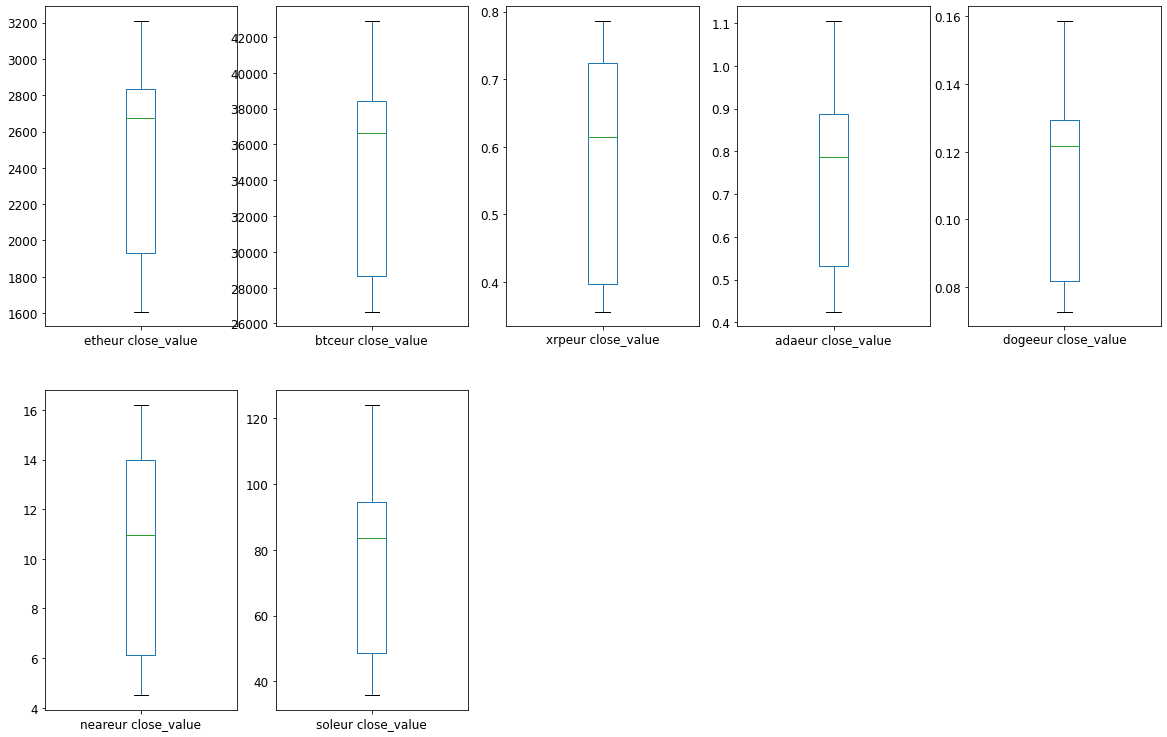

In [53]:
result.plot(kind="box", subplots=True, layout= (3,5), fontsize=12, figsize=(20,20));

## Vorhersage eines Index anhand von weiteren Indizes mittels linearer Regression

## Machine Learning Pipeline: Wrapping up for Deployment


In the previous notebooks, we worked through the typical Machine Learning pipeline steps to build a regression model that allows us to predict house prices. Briefly, we transformed variables in the dataset to make them suitable for use in a Regression model, then we selected the most predictive variables and finally we trained our model.

Now, we want to deploy our model. We want to create an API, which we can call with new data, with new characteristics about houses, to get an estimate of the SalePrice. In order to do so, we need to write code in a very specific way. We will show you how to write production code in the next sections.

Here, we will summarise the key pieces of code, that we need to take forward for this particular project, to put our model in production.

Let's go ahead and get started.

### Setting the seed

It is important to note, that we are engineering variables and pre-processing data with the idea of deploying the model. Therefore, from now on, for each step that includes some element of randomness, it is extremely important that we **set the seed**. This way, we can obtain reproducibility between our research and our development code.

This is perhaps one of the most important lessons that you need to take away from this course: **Always set the seeds**.

Let's go ahead and load the dataset.

In [78]:
# to handle datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to build the models
from sklearn.linear_model import Lasso

# to evaluate the models
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')


## Load data

We need the training data to train our model in the production environment. 

In [131]:
# load dataset
data = pd.read_csv('Gesamtliste.csv')
data = data.drop(data.columns[0],axis=1)
data = data.drop(data.columns[0],axis=1)
#data = data['Eröffnung_x'.replace('.','')



#data['Eröffnung_x'] = data['Eröffnung_x'].astype("float64")
#data['Eröffnung_y'] = data['Eröffnung_y'].astype("float64")
#data = data.drop(data.columns[0],axis=1)
print(data)
#data.head()
data.info()

#data = data['Eröffnung_x'.replace('.','')



#data['Eröffnung_x'] = data['Eröffnung_x'].astype("float64")
#data['Eröffnung_y'] = data['Eröffnung_y'].astype("float64")
#data = data.drop(data.columns[0],axis=1)
#print(data)
#data.head()
#data.info()


      Schluss DAX  Schluss EURO STOXX 50  Schluss Dow Jones  Schluss SMI  \
0         2548.37                2124.78            8214.60      4230.70   
1         2636.10                2184.98            8280.20      4263.60   
2         2579.33                2172.64            8229.80      4247.10   
3         2584.05                2132.51            8201.40      4194.50   
4         2520.84                2132.11            8145.70      4207.60   
...           ...                    ...                ...          ...   
3224     14142.09                3840.01           33811.40     12258.33   
3225     13924.17                3757.59           34049.46     12084.98   
3226     13756.40                3721.36           33240.18     11933.28   
3227     13793.94                3734.64           33301.93     12051.48   
3228     13979.84                3777.02           33916.39     12068.41   

      Schluss MSCI World  Schluss FTSE  Schluss ATX  Schluss SDAX  \
0                7

<AxesSubplot:>

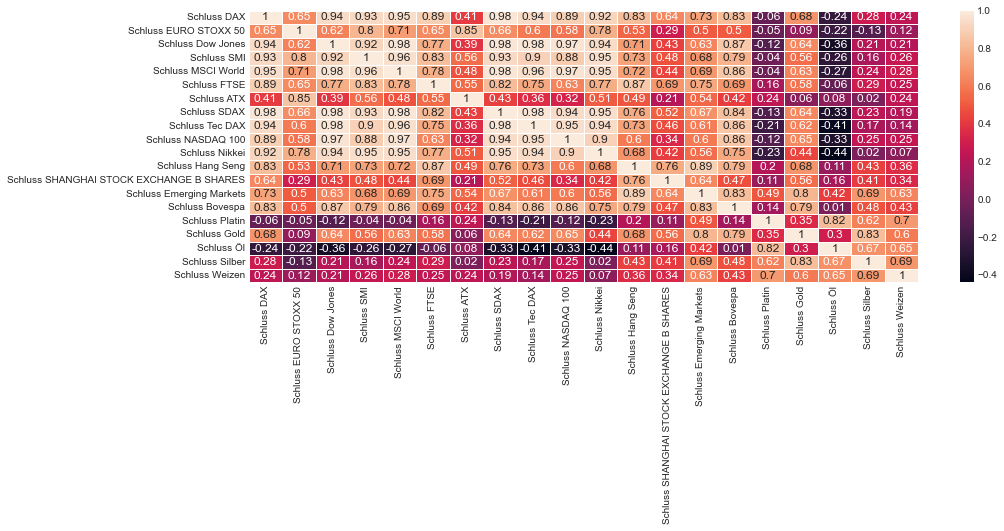

In [132]:
import seaborn as sns
df_heatmap = data.corr().round(2)
f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_heatmap, annot=True, annot_kws={'size': 12}, linewidths=.5)

## Separate dataset into train and test

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['Schluss DAX'],
    test_size=0.1,
    # we are setting the seed here
    random_state=0)

X_train.shape, X_test.shape


((2906, 20), (323, 20))

In [134]:
X_train.head()


,Schluss DAX,Schluss EURO STOXX 50,Schluss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa,Schluss Platin,Schluss Gold,Schluss Öl,Schluss Silber,Schluss Weizen
2651,12168.74,3386.72,25776.61,9645.04,2111.784,7334.19,3008.18,11223.39,2913.05,7420.656,21283.37,27692.27,291.526,998.000,94360.66,61.419998,1273.599976,802.799988,14.414000,472.75
921,6077.19,2686.09,10216.27,6228.31,1091.466,5167.02,2332.50,3996.06,776.09,1821.030,9548.11,20467.43,224.748,952.491,62960.10,74.949997,1198.500000,1511.500000,17.896999,521.25
3214,14446.48,3918.68,34818.27,12179.08,3057.067,7537.90,3320.36,14402.44,3305.26,14861.211,27665.98,21995.44,285.944,1145.848,121570.15,99.269997,1919.099976,985.000000,24.642000,984.50
1296,6141.05,2137.70,12411.23,5871.35,1184.098,5432.37,1901.08,4794.39,739.51,2517.180,8624.90,18953.63,230.152,914.873,54001.45,82.699997,1595.500000,1447.800049,28.606001,630.50
1081,7492.25,2952.90,12638.74,6526.51,1359.270,5976.77,2821.80,5351.44,926.86,2383.180,9859.20,23159.14,301.546,1163.338,64417.34,97.180000,1491.199951,1787.400024,35.283001,724.50


### Feature Scaling

For use in linear models, features need to be either scaled or normalised. In the next section, I will scale features between the min and max values:

In [36]:
# capture the target
#y_train = X_train['Eröffnung_y']
#y_test = X_test['Eröffnung_y']


In [135]:
scaler = MinMaxScaler()
scaler.fit(X_train)
IndexListe= ["Schluss DAX", "Schluss EURO STOXX 50", "Schluss Dow Jones",  "Schluss SMI", "Schluss MSCI World", "Schluss FTSE", "Schluss ATX", "Schluss SDAX", "Schluss Tec DAX", "Schluss NASDAQ 100", "Schluss Nikkei", "Schluss Hang Seng", "Schluss SHANGHAI STOCK EXCHANGE B SHARES", "Schluss Emerging Markets", "Schluss Bovespa", "Schluss Platin", "Schluss Gold", "Schluss Öl", "Schluss Silber", "Schluss Weizen"]
scaled = scaler.transform(X_train)
for i, col in enumerate(IndexListe):
    X_train[col] = scaled[:,i]

scaled_test = scaler.transform(X_test)

print('Vor dem Scaling:')
display(X_test.head())

for i, col in enumerate(IndexListe):
    X_test[col] = scaled_test[:,i]

print('\nNach dem Scaling:')
display(X_test.head())




Vor dem Scaling:


,Schluss DAX,Schluss EURO STOXX 50,Schluss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa,Schluss Platin,Schluss Gold,Schluss Öl,Schluss Silber,Schluss Weizen
1462,7682.58,2609.30,14756.78,7717.60,1438.808,6304.58,2371.66,5720.44,911.72,2838.410,13221.44,21672.03,255.052,1008.922,53990.830,88.720001,1386.800049,1450.000000,23.622000,703.50
2204,11464.74,3279.41,19974.62,8243.00,1761.427,7043.96,2632.85,9388.90,1786.98,4953.803,19494.53,21715.46,342.014,851.309,57427.499,52.230000,1131.500000,922.900024,16.054001,403.25
599,7435.67,4229.19,13181.91,8671.43,1554.457,6224.30,4618.43,6075.33,903.09,1918.560,16979.86,22538.44,324.271,1058.717,52846.000,75.480003,672.500000,1296.000000,13.100000,650.00
2606,11601.68,3312.10,26026.32,9412.02,2096.354,7106.73,3061.70,10945.87,2637.52,7151.572,21602.69,28830.38,301.075,1051.541,94730.460,55.799999,1296.400024,861.599976,15.169000,454.00
2667,12308.53,3454.70,26504.00,9961.65,2161.595,7403.54,2956.65,11145.25,2838.02,7667.738,21333.87,28161.92,289.707,1038.271,100303.410,53.759998,1344.599976,805.099976,14.945000,522.25



Nach dem Scaling:


,Schluss DAX,Schluss EURO STOXX 50,Schluss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa,Schluss Platin,Schluss Gold,Schluss Öl,Schluss Silber,Schluss Weizen
1462,0.379748,0.240908,0.247109,0.411755,0.276128,0.644596,0.321311,0.256212,0.159182,0.116990,0.259480,0.536413,0.420239,0.636277,0.358648,0.690739,0.615625,0.516010,0.446306,0.371161
2204,0.652870,0.504025,0.425328,0.471319,0.405202,0.821687,0.390414,0.489678,0.398492,0.252988,0.528148,0.538173,0.599633,0.500140,0.387353,0.491253,0.467993,0.197559,0.270962,0.109562
599,0.361918,0.876952,0.193318,0.519890,0.322397,0.625368,0.915733,0.278797,0.156823,0.057854,0.420448,0.571523,0.563031,0.679286,0.349085,0.618358,0.202568,0.422970,0.202521,0.324548
2606,0.662759,0.516860,0.632029,0.603850,0.539200,0.836722,0.503873,0.588766,0.631042,0.394281,0.618438,0.826495,0.515180,0.673088,0.698926,0.510770,0.563349,0.160524,0.250458,0.153779
2667,0.713803,0.572852,0.648344,0.666161,0.565302,0.907811,0.476080,0.601455,0.685862,0.427465,0.606925,0.799407,0.491729,0.661626,0.745475,0.499617,0.591222,0.126390,0.245268,0.213243


In [136]:
# explore maximum values of variables
scaler.data_max_


array([1.62717500e+04, 4.54257000e+03, 3.67996500e+04, 1.29063700e+04,
       3.24811800e+03, 7.78844000e+03, 4.93694000e+03, 1.74076000e+04,
       3.98696000e+03, 1.65733430e+04, 3.05117100e+04, 3.31119500e+04,
       5.36093000e+02, 1.43002600e+03, 1.30776270e+05, 1.45289993e+02,
       2.05150000e+03, 2.25110010e+03, 4.75200005e+01, 1.42525000e+03])

In [137]:
# explore minimum values of variables
scaler.data_min_


array([ 2.42387000e+03,  1.99575000e+03,  7.52202000e+03,  4.08560000e+03,
        7.48628000e+02,  3.61330000e+03,  1.15718000e+03,  1.69458000e+03,
        3.29520000e+02,  1.01866000e+03,  7.16290000e+03,  8.43500000e+03,
        5.13400000e+01,  2.72267000e+02,  1.10520000e+04, -3.76300011e+01,
        3.22200012e+02,  5.95900024e+02,  4.35900021e+00,  2.77500000e+02])

In [41]:
# transform the train and test set, and add on the Id and SalePrice variables
#X_train = scaler.transform(X_train[features])
#X_test = scaler.transform(X_test[features])


NameError: name 'features' is not defined

## Train the Linear Regression: Lasso

In [138]:
# set up the model
# remember to set the random_state / seed

lin_model = Lasso(alpha=0.005, random_state=0)

# train the model
lin_model.fit(X_train, y_train)

# we persist the model for future use
#joblib.dump(lin_model, 'lasso_regression.pkl')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Wir kreiren hier einen Benchmarkregressor, welcher den Durchschnittswert unseres Trainingsamples als Vorhersage nimmt.
class BenchmarkRegressor:
    def __init__(self):
        pass
    
    def fit(self, X, y, **kwargs):
        self.mean = y.mean()
        
    def predict(self, X):
        return [self.mean] * len(X)
    
    def get_params(self, deep=False):
        return {}


bm_regr = BenchmarkRegressor()
lr_regr = LinearRegression()
ri_regr = Ridge()
br_regr = BayesianRidge()
ls_regr = Lasso()
ll_regr = LassoLars()
ne_regr = KNeighborsRegressor()
dt_regr = DecisionTreeRegressor()
rf_regr = RandomForestRegressor()
xg_regr = xgb.XGBRegressor()

# Liste mit dem Namen der Modelle und dem Modell selbst, dies erwartet das Pipeline Objekt von SKLearn anschliesssend als Input.
models = [
    ('Benchmark', bm_regr),
    ('LR', lr_regr),
    ('Ridge', ri_regr),
    ('Bayesian Ridge', br_regr),
    ('Lasso', ls_regr),
    ('LARS Lasso', ll_regr),
    ('Nearest Neighbors (KNN) regression', ne_regr),
    ('Decision Tree', dt_regr),
    ('Random Forest', rf_regr),
    ('XGBoost', xg_regr),
]



In [139]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion, Pipeline


for name, model in models:
    pipelined_model = Pipeline([ 
                                 ('pca', PCA(n_components = 3)), 
                                 (name, model)
                            ])
    
    # Training des Models
    pipelined_model.fit(X_train, y_train)
    
    # Vorhersage des trainierten models auf X_test
    y_hat = pipelined_model.predict(X_test)
    
    # Berechnung der verschiedenen Messwerte resp. KPI's
    EVS = (explained_variance_score(y_test, y_hat))
    ME = (max_error(y_test, y_hat))
    MAE = (mean_absolute_error(y_test, y_hat))
    MSE = np.sqrt(mean_squared_error(y_test, y_hat, squared=True))
    RMSE = np.sqrt(mean_squared_error(y_test, y_hat, squared=False))
    R2 = r2_score(y_test, y_hat)
    print('Model: ', name, ' | EVS: ', EVS)
    print('Model: ', name, ' | ME: ', ME)
    print('Model: ', name, ' | MAE: ', MAE)
    print('Model: ', name, ' | MSE ', MSE)
    print('Model: ', name, ' | RMSE ', RMSE)
    print('Model: ', name, ' | R2 ', R2)
    print('----------------')
 

Model:  Benchmark  | EVS:  2.220446049250313e-16
Model:  Benchmark  | ME:  7199.064439091542
Model:  Benchmark  | MAE:  2823.643921916649
Model:  Benchmark  | MSE  3263.081330793196
Model:  Benchmark  | RMSE  57.12338689882801
Model:  Benchmark  | R2  -0.006602990051051583
----------------
Model:  LR  | EVS:  0.9531033511608427
Model:  LR  | ME:  1931.0171179063382
Model:  LR  | MAE:  595.4485894212656
Model:  LR  | MSE  708.7937501362173
Model:  LR  | RMSE  26.62318069157435
Model:  LR  | R2  0.9525056248872729
----------------
Model:  Ridge  | EVS:  0.9530919115743278
Model:  Ridge  | ME:  1931.425163824495
Model:  Ridge  | MAE:  595.6625283063398
Model:  Ridge  | MSE  708.8990376504685
Model:  Ridge  | RMSE  26.625157983577648
Model:  Ridge  | R2  0.9524915137693374
----------------
Model:  Bayesian Ridge  | EVS:  0.9531024129259843
Model:  Bayesian Ridge  | ME:  1931.051145553989
Model:  Bayesian Ridge  | MAE:  595.4664893254491
Model:  Bayesian Ridge  | MSE  708.8024185636909
Mode

Satisfaction predictions
R2:  0.9626523647171243
R2 for predictions:  0.950704313969708
Model:  XGBoost  | EVS:  0.9982592913758835
Model:  XGBoost  | ME:  1086.7048046874997
Model:  XGBoost  | MAE:  92.11277954479489
Model:  XGBoost  | MSE  135.81820022754238
Model:  XGBoost  | RMSE  11.654106582125562
----------------
Time:  2.040386915206909


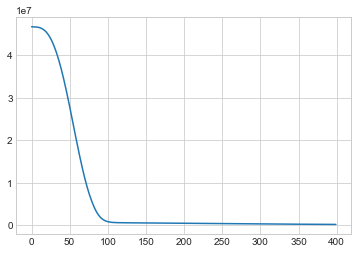

In [141]:
import time
start = time.time()

from sklearn.neural_network import MLPRegressor


nn_sat = MLPRegressor(hidden_layer_sizes = (15,15) ,max_iter=400).fit(X_train,y_train)
print('Satisfaction predictions')
print('R2: ', nn_sat.score(X_train,y_train))
plt.plot(nn_sat.loss_curve_)

predictions_nn_sat = nn_sat.predict(X_test)
print('R2 for predictions: ', nn_sat.score(X_test, y_test))
EVS = (explained_variance_score(y_test, y_hat))
ME = (max_error(y_test, y_hat))
MAE = (mean_absolute_error(y_test, y_hat))
MSE = np.sqrt(mean_squared_error(y_test, y_hat, squared=True))
RMSE = np.sqrt(mean_squared_error(y_test, y_hat, squared=False))
print('Model: ', name, ' | EVS: ', EVS)
print('Model: ', name, ' | ME: ', ME)
print('Model: ', name, ' | MAE: ', MAE)
print('Model: ', name, ' | MSE ', MSE)
print('Model: ', name, ' | RMSE ', RMSE)
print('----------------')

end = time.time()
print('Time: ', end - start)

In [142]:
std_nn = np.sqrt(sum((predictions_nn_sat - y_test)**2)/len(y_test))
print('Standard deviation: ', std_nn)

Standard deviation:  722.1098148311753


In [143]:
print(predictions_nn_sat)
print(y_test)

#print(predictions_nn_sat[1])
#print(y_test[3745])


[ 7854.41522104 10087.04928903  8727.41422471 12054.69785965
 12461.40081465  7726.15951138  8804.96212905 15418.31982017
  6471.24613632 12535.62242531 10720.20817408  6007.04291012
  7928.00009742  8683.7116017  11135.89168849  9676.88643022
  7947.35258357  8757.43559919 12336.86633836  2104.82624349
 12394.15113774  7264.54490298  7550.89348238 12382.24634727
  9947.47848699  8647.12992022  7115.75043207 12075.54776918
  6356.35656907  4934.20711271  6651.15050931 10952.98970044
  8156.2196612   7752.03379715  5837.68979457 11137.09951058
  5098.63455983 16835.52226354  6915.34293166 14481.44742911
  8291.49060744 15525.10833935  7231.53265379 12493.13836004
 12533.34665756 10850.10989244 11774.89482366  7946.5259712
  7099.23331005  9841.80612874 16460.37902072  9158.3150416
  7534.55034955 10579.32222423  8708.19276503  9248.05984728
 13092.03411652  4018.89040688  6889.44761289  9164.59523393
  8664.21099896  6427.46620355  3761.66050284  8854.42276318
  7920.95781305  7790.9391

KeyError: 3745

That is all for this notebook. And that is all for this section too.

**In the next section, we will show you how to productionise this code for model deployment**.

## Kursvorhersage von Rohstoffen mittels RNN

In [ ]:
IndizesName = input("Please enter the name of the Index you want to predict: ")
#print(IndizesName)

[*********************100%***********************]  5 of 5 completed
2024/2024 [==============================] - 70s 32ms/step - loss: 0.0026


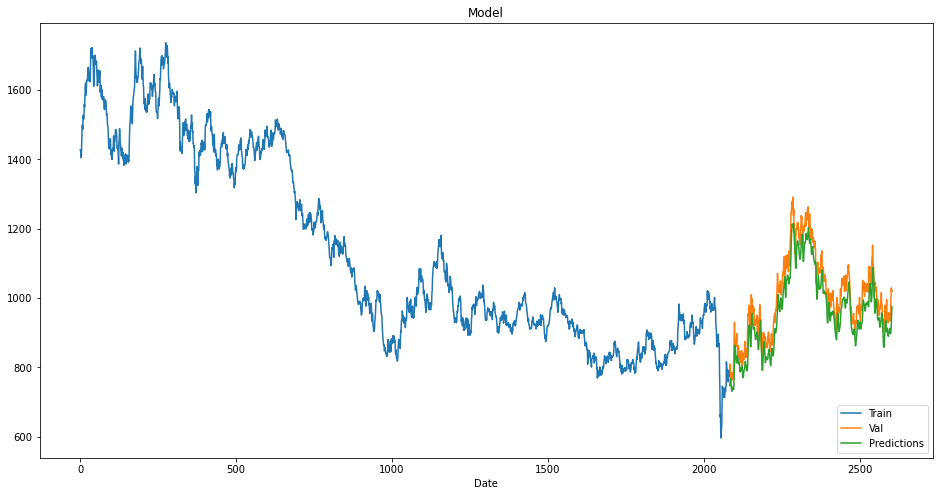

In [28]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import plotly.express as px
import os
import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import csv
import warnings
warnings.filterwarnings("ignore")

#os.chdir('C:/Users/Sven Konermann/Documents/GitHub/DataScience/Data')
os.chdir('C:/Users/manue/OneDrive - ZHAW/MSc Wirtschaftsinformatik/2. Semester/Applied Data Science/ADS Projekt/DataScience/Data')
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
tickers_list= ['PL=F','GC=F', 'CL=F', 'SI=F', 'ZW=F']
data = yf.download(tickers_list, '2012-1-1')['Adj Close']

#Scraping Loop
x=0
while x < len(tickers_list):
    data.to_csv(tickers_list[x]+"_Test1.csv")
    df = pd.read_csv(tickers_list[x]+"_Test.csv", delimiter=',', header=0, index_col=False)

#Data Normalization

    data = df.filter([tickers_list[x]])
    dataset = data.values
    training_data_len = math.ceil(len(dataset) * .8)
    training_data_len
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    train_data = scaled_data[0:training_data_len ,:]

    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
    
#Model

    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    
    model.compile(optimizer='RMSprop', loss='mean_squared_error')
    
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    
    test_data = scaled_data[training_data_len - 60: , :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
        
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    
    rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
    
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.plot(train[tickers_list[x]])
    plt.plot(valid[[tickers_list[x], 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show
    
    plt.savefig(tickers_list[x]+'.png')
    
    valid.to_csv(tickers_list[x]+'_valid.csv')
    
    score=(sum(abs(valid[tickers_list[x]]-valid['Predictions'])/valid[tickers_list[x]])/len(valid[tickers_list[x]]))*100
    score1=[]
    score1.append(score)
        
    acc_score=(1-sum(abs(valid[tickers_list[x]]-valid['Predictions'])/valid[tickers_list[x]])/len(valid[tickers_list[x]]))*100
    acc_score1=[]
    acc_score1.append(acc_score)
    x+=100

with open('score.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(score1)  
        
with open('accscore.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(acc_score1) 

In [29]:
x=0
df = pd.read_csv(tickers_list[x]+"_Test1.csv", delimiter=',', header=0, index_col=False)
df = np.array(df)
count = 0
rows = len(df)
columns = len(df[1])
for x in range(0,rows):
    for y in range(0,columns):
        if(df[x][y] in {'NaN','infinity','nan','Infinity',''}):
            df = np.delete(df,x,0)
            count = count +1
print("Deleted Rows: "+str(count))

Deleted Rows: 0
